In [1]:
!pip install prophet

In [2]:
import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
running_shorts_df = pd.read_csv("resources/running_shorts.csv", skiprows=1, header=None, names=['Month', 'Running Shorts'])
tennis_skirt_df = pd.read_csv('resources/tennis_skirt.csv', skiprows=1, header=None, names=['Month', 'Tennis Skirts'])
lulu_lemon_df = pd.read_csv('resources/lululemon.csv', skiprows=1, header=None, names=['Month', 'lululemon Sales'])

In [17]:
# def make_predict(df):
#     #df.drop(0, inplace=True)
#     df.columns = [['ds', 'y']]
#     df['cap'] = 100
#     df['floor'] = 0
#     model = Prophet(growth='logistic')
#     model.fit(df)

#     future = model.make_future_dataframe(periods=100, freq='M')
#     future['cap'] = 100
#     future['floor'] = 0

#     forecast = model.predict(future)

#     display(forecast.head(10))
    
# make_predict(lulu_lemon_df)

    

In [18]:
running_shorts_df


#lulu_lemon_df.reset_index(drop = True, inplace=True)


,Month,Running Shorts
0,Month,running shorts: (United States)
1,2014-01,19
2,2014-02,22
3,2014-03,29
4,2014-04,31
...,...,...
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34


In [19]:
running_shorts_df.drop(0, inplace=True)
running_shorts_df

,Month,Running Shorts
1,2014-01,19
2,2014-02,22
3,2014-03,29
4,2014-04,31
5,2014-05,38
...,...,...
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34


In [20]:
running_shorts_df.columns

Index(['Month', 'Running Shorts'], dtype='object')

In [21]:
running_shorts_df = running_shorts_df.rename(columns={'Month':'ds', 'lululemon Sales':'y'})

In [22]:
running_shorts_df.tail(5)

,ds,Running Shorts
116,2023-08,56
117,2023-09,42
118,2023-10,33
119,2023-11,34
120,2023-12,29


In [23]:
# non logi
m = Prophet()

m.fit(running_shorts_df)

future = m.make_future_dataframe(periods=60, freq='M')

forecast = m.predict(future)

m.plot(forecast)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
running_shorts_df['cap'] = 100
running_shorts_df['floor'] = 0

model = Prophet(growth='logistic')
model.fit(running_shorts_df)

future = model.make_future_dataframe(periods=100, freq='M')
future['cap'] = 100
future['floor'] = 0

forecast = model.predict(future)

display(forecast.tail(50))


In [ ]:
m.plot(forecast)

In [ ]:
# Call the Prophet function and store as an object
m = Prophet()
m


In [ ]:
m.fit(lulu_lemon_df)

In [ ]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future = m.make_future_dataframe(periods=60, freq='M')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))

In [ ]:
forecast = m.predict(future)
display(forecast.head(10))

In [ ]:
m.plot(forecast)

In [ ]:
tennis_skirt_df

In [24]:
lulu_lemon_df.dropna()

,Month,lululemon Sales
0,Month,lululemon: (United States)
1,2014-01,23
2,2014-02,20
3,2014-03,22
4,2014-04,20
...,...,...
116,2023-08,63
117,2023-09,57
118,2023-10,61
119,2023-11,100


In [25]:
m.fit(lulu_lemon_df)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

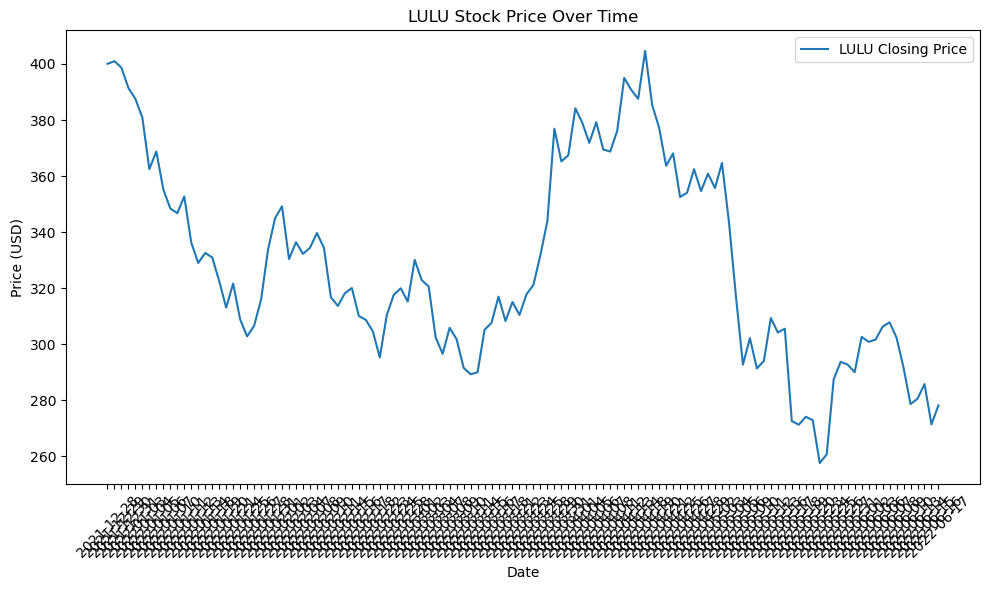

In [26]:
# STOCK DATA
ticker = "LULU"

api_url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/2014-01-01/2023-12-01?adjusted=true&sort=asc&limit=120&apiKey=s3nEpo1Ar6jYpz1NE1HF5xeff7HBikJK"
# URL and API key (Note: Using the provided API key)
url = api_url

# Performing the GET request
response = requests.get(url)
data = response.json()

# Extracting the necessary information
dates = [item["t"] for item in data["results"]]
closing_prices = [item["c"] for item in data["results"]]

# Converting timestamp to readable date format
from datetime import datetime
dates = [datetime.fromtimestamp(date/1000).strftime('%Y-%m-%d') for date in dates]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices, label=f"{ticker} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(f"{ticker} Stock Price Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:

results = data['results']

# Creating a DataFrame
lulu_df = pd.DataFrame(results)

# Selecting only the timestamp ('t') and closing price ('c') columns
lulu_df = lulu_df[['t', 'c']]

# Converting timestamp to a readable format
lulu_df['t'] = pd.to_datetime(lulu_df['t'], unit='ms').dt.date

lulu_df = lulu_df.rename(columns={'t': 'ds', 'c': 'y'})
lulu_df.dropna()

lulu_df.head()  # Displaying the DataFrame

,ds,y
0,2021-12-28,400.07
1,2021-12-29,401.00
2,2021-12-30,398.69
3,2021-12-31,391.45
4,2022-01-03,387.56


In [28]:

m = Prophet()
m.fit(lulu_df)

19:57:13 - cmdstanpy - INFO - Chain [1] start processing
19:57:13 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = m.make_future_dataframe(periods=500, freq='D')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))


,ds
0,2021-12-28
1,2021-12-29
2,2021-12-30
3,2021-12-31
4,2022-01-03
5,2022-01-04
6,2022-01-05
7,2022-01-06
8,2022-01-07
9,2022-01-10


In [30]:
forecast = m.predict(future)
display(forecast.head(10))


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-28,367.439373,331.789422,391.328750,367.439373,367.439373,-5.498100,-5.498100,-5.498100,-5.498100,-5.498100,-5.498100,0.0,0.0,0.0,361.941273
1,2021-12-29,366.623534,330.524905,392.023797,366.623534,366.623534,-4.279652,-4.279652,-4.279652,-4.279652,-4.279652,-4.279652,0.0,0.0,0.0,362.343882
2,2021-12-30,365.807694,328.865274,391.025574,365.807694,365.807694,-5.622989,-5.622989,-5.622989,-5.622989,-5.622989,-5.622989,0.0,0.0,0.0,360.184705
3,2021-12-31,364.991855,322.806044,385.655889,364.991855,364.991855,-9.840563,-9.840563,-9.840563,-9.840563,-9.840563,-9.840563,0.0,0.0,0.0,355.151292
4,2022-01-03,362.544336,325.416374,386.466070,362.544336,362.544336,-6.515780,-6.515780,-6.515780,-6.515780,-6.515780,-6.515780,0.0,0.0,0.0,356.028557
5,2022-01-04,361.728497,325.582340,386.647971,361.728497,361.728497,-5.498100,-5.498100,-5.498100,-5.498100,-5.498100,-5.498100,0.0,0.0,0.0,356.230396
6,2022-01-05,360.912657,326.107479,389.338590,360.912657,360.912657,-4.279652,-4.279652,-4.279652,-4.279652,-4.279652,-4.279652,0.0,0.0,0.0,356.633005
7,2022-01-06,360.096818,322.230170,385.875558,360.096818,360.096818,-5.622989,-5.622989,-5.622989,-5.622989,-5.622989,-5.622989,0.0,0.0,0.0,354.473828
8,2022-01-07,359.280978,317.393429,382.955148,359.280978,359.280978,-9.840563,-9.840563,-9.840563,-9.840563,-9.840563,-9.840563,0.0,0.0,0.0,349.440415
9,2022-01-10,356.833459,318.026529,382.502837,356.833459,356.833459,-6.515780,-6.515780,-6.515780,-6.515780,-6.515780,-6.515780,0.0,0.0,0.0,350.317680


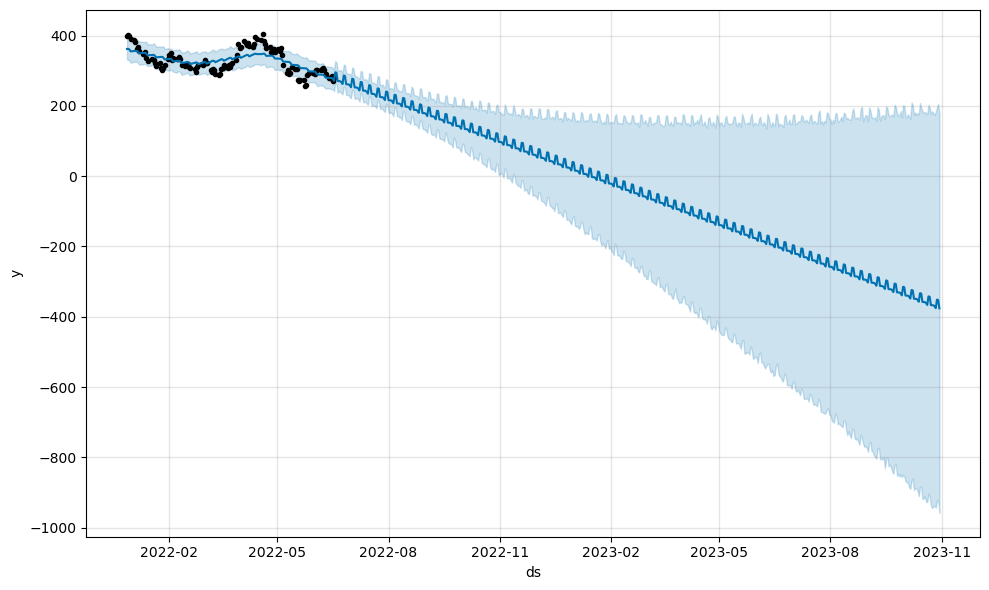

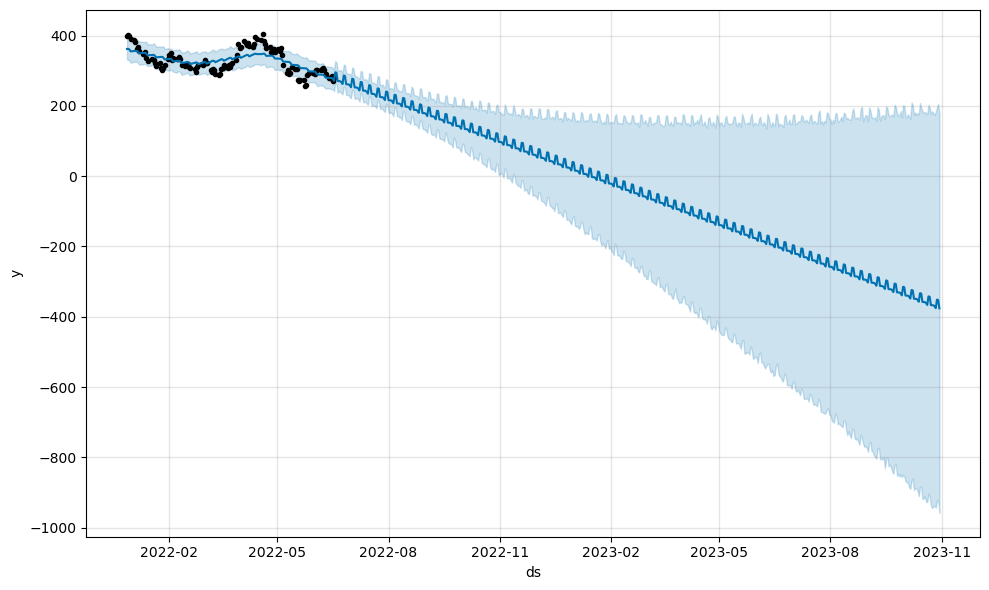

In [31]:
m.plot(forecast)

In [32]:
lulu_lemon_df

,Month,lululemon Sales
0,Month,lululemon: (United States)
1,2014-01,23
2,2014-02,20
3,2014-03,22
4,2014-04,20
...,...,...
116,2023-08,63
117,2023-09,57
118,2023-10,61
119,2023-11,100


In [33]:
#lulu_lemon_df = lulu_lemon_df.drop(0)
#

In [34]:
lulu_lemon_df

,Month,lululemon Sales
0,Month,lululemon: (United States)
1,2014-01,23
2,2014-02,20
3,2014-03,22
4,2014-04,20
...,...,...
116,2023-08,63
117,2023-09,57
118,2023-10,61
119,2023-11,100


In [52]:
#running_shorts_df = running_shorts_df.drop(0)
#running_shorts_df
#tennis_skirt_df = tennis_skirt_df.drop(0)
#lulu_lemon_df = lulu_lemon_df.drop(0)
#tennis_skirt_df.reset_index(drop = True, inplace=True)
#tennis_skirt_df = tennis_skirt_df.drop(0)
#lulu_lemon_df = lulu_lemon_df.drop(0)
running_shorts_df = running_shorts_df.rename(columns={'ds': 'Month'})
lulu_lemon_df

,Month,lululemon Sales
1,2014-01,23
2,2014-02,20
3,2014-03,22
4,2014-04,20
5,2014-05,18
...,...,...
116,2023-08,63
117,2023-09,57
118,2023-10,61
119,2023-11,100


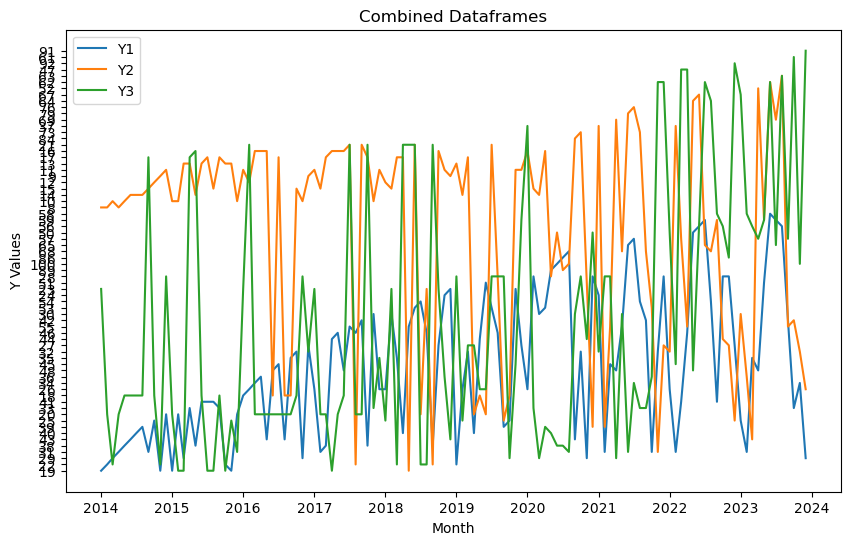

In [57]:


df1 = running_shorts_df 
df2 = tennis_skirt_df
df3 = lulu_lemon_df  

# Merge or concatenate dataframes based on the date
merged_df = pd.merge(df1, df2, on='Month').merge(df3, on='Month')

# Convert 'Date' column to datetime
merged_df['Month'] = pd.to_datetime(merged_df['Month'])

# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(merged_df['Month'], merged_df['Running Shorts'], label='Y1')
plt.plot(merged_df['Month'], merged_df['Tennis Skirts'], label='Y2')
plt.plot(merged_df['Month'], merged_df['lululemon Sales'], label='Y3')

plt.xlabel('Month')
plt.ylabel('Y Values')
plt.title('Combined Dataframes')
merged_df.head()
plt.legend()
#plt.show()

In [59]:
merged_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales
0,2014-01-01,19,8,23
1,2014-02-01,22,8,20
2,2014-03-01,29,10,22
3,2014-04-01,31,8,20
4,2014-05-01,38,10,18
...,...,...,...,...
115,2023-08-01,56,63,63
116,2023-09-01,42,55,57
117,2023-10-01,33,42,61
118,2023-11-01,34,32,100
